# <span style="color:rgb(160,0,86)">Stichproben</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie wissen was eine **Zufallsstichprobe** ist und kennen ihre Bedeutung.
- Sie können einfache **binomial verteilte Modelle** berechnen und mit Daten vergleichen.
- Sie verstehen die Problematik der **Stichprobenverzerrung** und der **Auswahlverzerrung**.  
- Sie kennen den Unterschied zwischen der **Datenverteilung** der **Stichprobenverteilung**.  

***

### <span style="color:rgb(160,0,86)">Was ist eine Stichprobe?</span>

Bei einer statistischen Analyse möchte man Aussagen zu einer **Grundgesamtheit** oder **Population** von statistischen Einheiten machen, deren Merkmale einer bestimmten *theoretischen* Verteilung folgen. 
$$\begin{array}{c|cccc}
&\text{Merkmal A}&\text{Merkmal B}&\text{Merkmal C}&\cdots\\ \hline \text{Einheit 1}&a_1&b_1&c_1&\cdots\\
\text{Einheit 2}&a_2&b_2&c_2&\cdots\\
\text{Einheit 3}&a_3&b_3&c_3&\cdots\\
\text{Einheit 4}&a_4&b_4&c_4&\cdots\\
\text{Einheit 5}&a_5&b_5&c_5&\cdots\\
\vdots&\vdots&\vdots&\vdots&\end{array}$$
Hätten wir die Daten zu allen Einheiten, könnten wir die **relativen Häufigkeiten** der Werte zu jedem Merkmal bestimmen und eine Analyse machen. Diese Verteilung ist aber im Allgemeinen nicht bekannt. Alles was uns zur Verfügung steht, sind die Daten, die wir aus einer **Stichprobe** erhalten. 
$$\begin{array}{c|cccc}
&\text{Merkmal A}&\text{Merkmal B}&\text{Merkmal C}&\cdots\\ \hline \textcolor{lightgray}{\text{Einheit 1}}&\textcolor{lightgray}{a_1}&\textcolor{lightgray}{b_1}&\textcolor{lightgray}{c_1}&\textcolor{lightgray}{\cdots}\\
\text{Einheit 2}&a_2&b_2&c_2&\cdots\\
\textcolor{lightgray}{\text{Einheit 3}}&\textcolor{lightgray}{a_3}&\textcolor{lightgray}{b_3}&\textcolor{lightgray}{c_3}&\textcolor{lightgray}{\cdots}\\
\textcolor{lightgray}{\text{Einheit 4}}&\textcolor{lightgray}{a_4}&\textcolor{lightgray}{b_4}&\textcolor{lightgray}{c_4}&\textcolor{lightgray}{\cdots}\\
\text{Einheit 5}&a_5&b_5&c_5&\cdots\\
\vdots&\vdots&\vdots&\vdots&\end{array}$$

Wir kennen also die ***empirische* Verteilung** der Werte zu jedem Merkmal in der Stichprobe. Damit wir aus der Stichprobe etwas über die Gesamtheit sagen können, ist entscheident, mit welchen Verfahren wir so eine Stichprobe ziehen. 

<span style="color:rgb(160,0,86)">***Definition:***</span>
Eine **Stichprobe** ist eine Teilmenge von Daten aus einem grösseren Datensatz, der sogenannten **Grundgesamtheit**. Die Grundgesamtheit ist ein grosser, definierter, aber manchmal theoretischer oder imaginärer Datensatz.

<center>
<img src="Bilder/Grundgesamtheit-Stichprobe.png" width="55%" />
</center>

<span style="color:rgb(160,0,86)">***Modellierung der Grundgesamtheit:***</span>
In speziellen Situationen, etwa wenn Daten aus einem physikalischen Prozess generiert werden, können wir mit strengen Annahmen und theoretischen Überlegungen die Verteilung der Grundgesamtheit beschreiben: Wenn zum Beispiel Daten mit einen binären Zufallsprozess, der $n$ mal unabhängig voneinander Werte wie *Kopf* oder *Zahl*, *klicken* oder *nicht klicken*, *Betrug* oder *kein Betrug* etc. erzeut, dann ist die Anzahl *Kopf*, *klicken* oder *Betrug* **binomial verteilt**. In so einem Fall können wir Erkenntnisse gewinnen, indem wir unser Wissen über die Grundgesamtheit nutzen.

<span style="color:rgb(160,0,86)">***Beispiel:***</span> Werfen wir **10 mal eine gezinkte Münze**, bei der *Kopf* mit Wahrscheinlichkeit $65\%$ erscheint:

In [1]:
from scipy.stats import bernoulli

X = bernoulli(p=0.65)
X.rvs(size=10)

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

Nun zählen wir, **wie oft Kopf** vorkommt und wiederholen diesen Prozess 15 mal. Damit erzeugen wir eine Stichprobe mit 15 statistischen Einheiten zum Merkmal *Anzahl Kopf*: 

In [2]:
stichprobe = [sum(X.rvs(size=10)) for _ in range(15)]
stichprobe

[7, 6, 8, 6, 7, 6, 7, 9, 9, 4, 6, 8, 4, 8, 3]

In einem Dichtediagramm können wir die ***empirische* Verteilung** der Anzahl Kopf darstellen: 

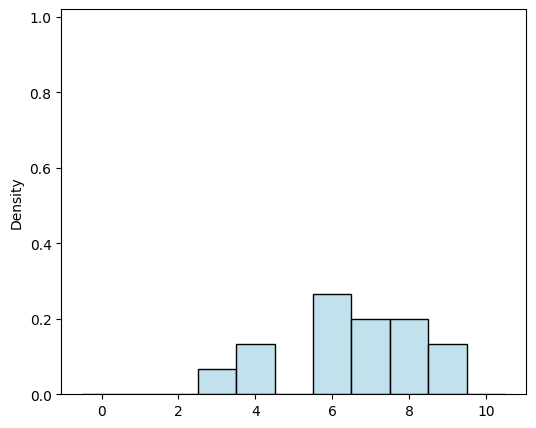

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)
ax = sns.histplot(stichprobe,bins=np.arange(-0.5,11.5),stat="density",color="lightblue")
ax = plt.ylim(0,1.02)
plt.show()

Wenn wir eine Stichprobe mit 100000 Einheiten erzeugen, erkennen wir die **theoretische Verteilung der Grundgesamtheit**:

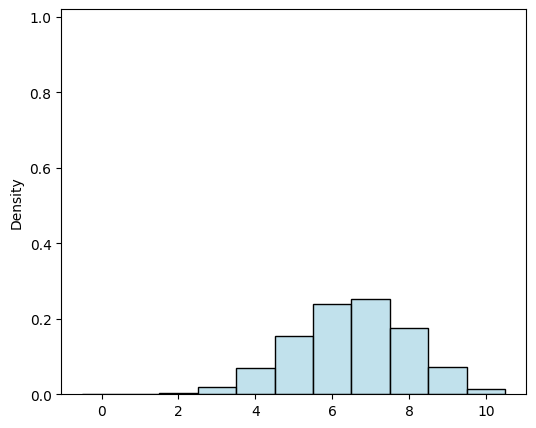

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

stichprobenUmfang = 100000
stichprobe = [sum(X.rvs(size=10)) for _ in range(stichprobenUmfang)]

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)
ax = sns.histplot(stichprobe,bins=np.arange(-0.5,11.5),stat="density",color="lightblue")
ax = plt.ylim(0,1.02)
plt.show()

Mathematisch kann man zeigen, dass die *Anzahl Kopf in 10 Würfen* einer **Binomial Verteilung** $\mathsf{Bin}(0.65,10)$ folgt:

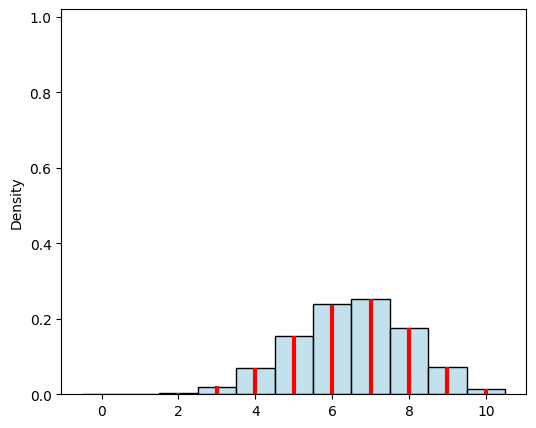

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import binom

Y = binom(p=0.65,n=10)
y = Y.pmf(np.array([0,1,2,3,4,5,6,7,8,9,10]))

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)
ax = sns.histplot(stichprobe,bins=np.arange(-0.5,11.5),stat="density",color="lightblue")
ax = plt.vlines(np.array([0,1,2,3,4,5,6,7,8,9,10]),0,y,lw=3,color="red")
ax = plt.ylim(0,1.02)
plt.show()

Wenn uns zum Beispiel die mittlere Anzahl Kopf bei 10 Würfen interessiert, können wir hier diese Anzahl aus der ***empirischen* Verteilung** der Stichprobe oder aus der ***theoretischen* Verteilung** der Grundgesamtheit berechnen:

In [8]:
#aus der empirischen Verteilung:
mittelwert = sum(stichprobe)/stichprobenUmfan
# aus der theoretischen Verteilung:
erwartungswert = Y.mean()
print("Arithmetisches Mittel der Stichprobe:",mittelwert)
print("Erwartungswert der theoretischen Verteilung:",erwartungswert)

Arithmetisches Mittel der Stichprobe: 6.49958
Erwartungswert der theoretischen Verteilung: 6.5


### <span style="color:rgb(160,0,86)">Aufgabe 1</span>
Auf einer Webseite gibt es 20 *Elemente mit Werbung* auf die User klicken können. Nehmen  wir an, dass ein User bei einem Besuch jedes Element mit einer Wahrscheinlichkeit von $p=0.33$ anklickt.
- Erzeugen Sie mit einer Bernoulli verteilten Zufallsvariablen eine Stichprobe für 200000 Besuche und stellen Sie die empirische Verteilung der **Anzahl Klicks pro Besuch** graphisch dar.
- Zeichnen Sie unter diesen Annahmen auch die theoretische Verteilung der Grundgesamtheit in die gleiche Figur.
- Vergleichen Sie die mittlere Anzahl Klicks pro Besuch in der Stichprobe mit dem Erwartungswert.

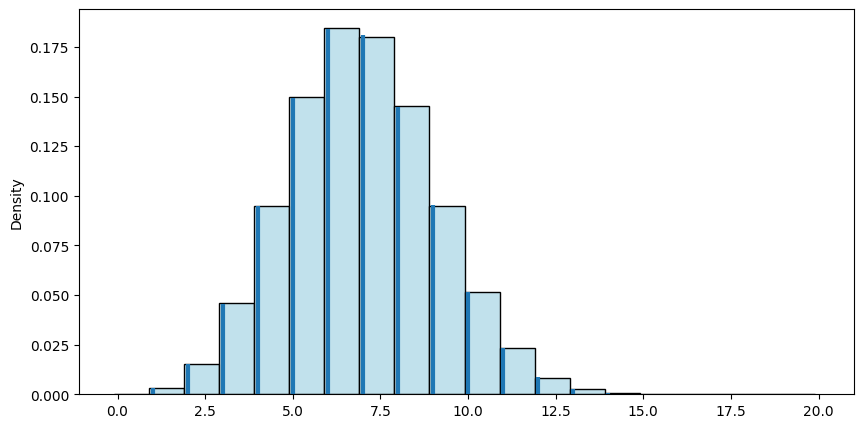

Empirischer Mittelwert=6.59642, Erwartungswert=6.59999999999999


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import bernoulli, binom

p = 0.33
x = np.linspace(-0.1,1.1,200)
X = bernoulli(p)

numCounts = []
for i in range(200000):
    sample = X.rvs(size=20)
    numCounts.append(sample.sum())

numCounts = np.array(numCounts)

x = np.linspace(-0.1,20.1,200)
X1 = binom(p=p, n=20)
X1_pmf = X1.pmf(np.arange(0,21))

fig = plt.figure(figsize=(10,5))
sns.histplot(numCounts,bins=np.arange(-0.1,20.1),stat="density",color="lightblue")
plt.vlines(np.arange(0,21),0,X1_pmf,lw=3)

plt.show()
X1_pmf

print(f"Empirischer Mittelwert={numCounts.mean()}, Erwartungswert={X1.expect()}")

### <span style="color:rgb(160,0,86)">Aufgabe 2</span>
Ein grosses Rechenzentrum bereibt 50 Server. Die Wahrscheinlichkeit, dass ein Server an einem Tag ausfällt, beträgt $2\%$.
- Erzeugen Sie mit einer Bernoulli verteilten Zufallsvariablen eine Stichprobe von 5 Jahren und stellen Sie die empirische Verteilung der **Anzahl Ausfälle pro Tag** graphisch dar.
- Zeichnen Sie unter diesen Annahmen auch die theoretische Verteilung der Grundgesamtheit in die gleiche Figur.
- Vergleichen Sie die mittlere Anzahl Ausfälle pro Tag in der Stichprobe mit dem Erwartungswert.

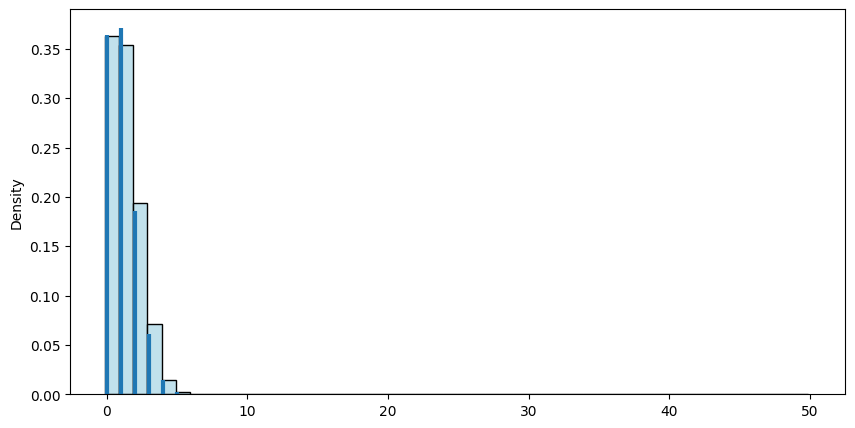

Empirischer Mittelwert=1.0301369863013699, Erwartungswert=1.0000000000000002


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import bernoulli

p=0.02
Xb = bernoulli(p)

sampleA = []
for i in range(365 * 5):
    tmp = Xb.rvs(size=50)
    sampleA.append(tmp.sum())
    

sampleA = np.array(sampleA)

x = np.linspace(-0.1,50.1,2000)
Xbin = binom(p=p, n=50)
Xbin_pmf = Xbin.pmf(np.arange(0,51))

fig = plt.figure(figsize=(10,5))
sns.histplot(sampleA,bins=np.arange(-0.1,50.1),stat="density",color="lightblue")
plt.vlines(np.arange(0,51),0,Xbin_pmf,lw=3)

plt.show()

print(f"Empirischer Mittelwert={sampleA.mean()}, Erwartungswert={Xbin.expect()}")

***

### <span style="color:rgb(160,0,86)">Was sind Zufallsstichproben?</span>

In den **Datenwissenschaften** machen wir uns selten Gedanken über solche theoretischen Eigenschaften der Verteilungen in der Grundgesamtheit, stattdessen fokusieren wir uns auf die **Stichprobenziehungsverfahren** und konzentrieren uns auf die **zur Verfügung stehenden Daten**. Es wäre oft gar nicht möglich die theoretischen Verteilungen in der Grundgesamtheit zu berechnen.

<span style="color:rgb(160,0,86)">***Definition:***</span> 
Bei einem *Zufallsstichprobenverfahren* hat jede verfügbare Einheit der Grundgesamtheit bei jeder Ziehung *die gleiche Chance*, in die Stichprobe aufgenommen zu werden. Die daraus resultierende Stichprobe wird als **einfache Zufallsstichprobe** bezeichnet. 

Die Stichprobenziehung kann
- **mit Zurücklegen** erfolgen, die Einheiten werden nach jeder Ziehung wieder in die Grundgesamtheit aufgenommen, damit sie in Zukunft erneut ausgewählt werden können.
- **ohne Zurücklegen** erfolgen, die Einheiten werden nach jeder Ziehung nicht wieder in die Grundgesamtheit aufgenommen, damit stehen die einmal ausgewählten Einheiten für künftige Ziehungen nicht mehr zur Verfügung.
<br>

Bei der Erstellung einer Schätzung oder eines Modells auf der Grundlage einer Stichprobe ist die **Datenqualität** oft wichtiger als die Datenmenge. Die Datenqualität in den Datenwissenschaften umfasst 
- Vollständigkeit,
- Konsistenz des Formats,
- Sauberkeit und Genauigkeit der einzelnen Datenpunkte.

In der Statistik sagen wir, dass eine Stichprobe **repräsentativ** sein muss.

#### <span style="color:rgb(160,0,86)">Beispiele:</span>
Ein klassisches Beispiel für eine nicht repräsentative Umfrage ist die *Literary-Digest-Umfrage* von 1936 in den USA, die den Sieg von Al Landon gegen Franklin Roosevelt vorhersagte. Die *Literary-Digest*, eine führende Zeitschrift der damaligen Zeit, befragte seinen gesamten Abonnentenstamm sowie weitere Einzelpersonen, insgesamt über 10 Millionen, und sagte einen Erdrutschsieg für Landon voraus. 

George Gallup, der Begründer der *Gallup-Umfrage*, führte alle zwei Wochen Umfragen unter nur 2000 Personen durch und sagte einen Sieg Roosevelts voraus. Der Unterschied lag in der Auswahl der befragten Personen.

The *Literary-Digest* entschied sich für Quantität und schenkte der Methode der Auswahl wenig Beachtung. Sie befragten schliesslich Personen mit einem relativ hohen sozioökonomischen Status (ihre eigenen Abonnenten sowie diejenigen, die aufgrund des Besitzes von Luxusgütern wie Telefonen und Autos in den Listen der Vermarkter auftauchten). Das Ergebnis war eine **Verzerrung der Stichprobe**, das heisst die Stichprobe unterschied sich in einer bedeutenden, nicht zufälligen Weise von der grösseren Population, die sie repräsentieren sollte.

Die Feststellung *nicht zufällig* ist wichtig, denn kaum eine Stichprobe, auch keine Zufallsstichprobe, kann die Grundgesamtheit exakt repräsentativ abbilden. 

Eine Verzerrung der Stichprobe liegt vor, wenn der Unterschied bedeutsam ist und davon ausgegangen werden kann, dass er auch bei anderen Stichproben, die auf die gleiche Weise wie die erste erhoben werden, bestehen bleibt.


***

### <span style="color:rgb(160,0,86)">Was ist eine Stichprobenverzerrung?</span>

Die Bewertungen von Restaurants, Hotels, Cafés usw., die sie auf Social-Media-Websites lesen, sind anfällig für Verzerrungen, da die Personen, die sie abgeben, nicht zufällig ausgewählt werden, sondern selbst die Initiative zum Schreiben ergriffen haben. Dies führt zu einer **Verzerrung durch Selbstselektion**. Die Personen, die motiviert sind, Bewertungen zu schreiben, sind möglicherweise diejenigen, die schlechte Erfahrungen gemacht haben, die mit der Einrichtung in Verbindung stehen oder die einfach eine andere Art von Person sind als diejenigen, die keine Bewertungen schreiben. 

Beachten sie, dass Stichproben mit Selbstselektion zwar unzuverlässige Indikatoren für die tatsächliche Situation sein können, dass sie aber zuverlässig sein können, wenn man einfach einen Betrieb **mit einem ähnlichen vergleicht**, weil allenfalls derselbe Selbstselektionsbias für beide gelten.

<span style="color:rgb(160,0,86)">***Definition:***</span> 
Eine statistische **Verzerrung** (Bias) bezieht sich auf systematische Mess- oder Stichprobenfehler, die durch das Mess- oder Stichprobenverfahren verursacht werden. Eine wichtige Unterscheidung sollte zwischen Fehlern aufgrund 
- **des Zufalls** und von
- **Verzerrungen** getroffen werden.

Betrachten wir den physikalischen Prozess eines Gewehrs, das auf ein Ziel schiesst. Es wird nicht jedes Mal der Mittelpunkt des Ziels getroffen. Auch bei einem unverzerrten Prozess gibt es Fehler, aber diese sind zufällig und tendieren nicht stark in eine Richtung. Ergebnisse zeigen eine Verzerrung, wenn es immer noch zufällige Fehler gibt, aber die Schüsse zum Beispiel dazu neigen, in einen anderen Quadranten zu fallen.

<center>
<img src="Bilder/Bias.png" width="55%" />
</center>

Verzerrungen treten in verschiedenen Formen auf und können **beobachtbar** oder **unsichtbar** sein. Wenn ein Ergebnis auf eine Verzerrung hindeutet (etwa bezüglich eines Referenzwertes oder tatsächliche Werte), ist dies häufig ein Indikator dafür, dass ein statistisches oder maschinelles Lernmodell falsch spezifiziert wurde oder ein wichtiges Merkmal nicht berücksichtigt wurde.

Um das Problem der Stichprobenverzerrung zu vermeiden, das den *Literary-Digest* dazu veranlasste, Landon gegenüber Roosevelt zu bevorzugen, entschied sich George Gallup für wissenschaftlichere Methoden, um eine für die amerikanische Wählerschaft repräsentative Stichprobe zu erhalten. Heute gibt es eine Vielzahl von Methoden, um **Repräsentativität** zu erreichen, aber das Herzstück all dieser Methoden ist die Zufallsstichprobe.

Zufallsstichproben zu erhalten ist nicht immer einfach. Die richtige Definition einer zugänglichen Population ist entscheidend. 

#### <span style="color:rgb(160,0,86)">Beispiele:</span>
Nehmen wir an, wir wollen ein repräsentatives Profil von Kunden erstellen und müssen eine Pilotkundenbefragung durchführen. Die Umfrage muss repräsentativ sein, ist aber arbeitsintensiv. Zunächst müssen wir definieren, wer ein Kunde ist. Wir könnten alle Kundendatensätze auswählen, bei denen der Kaufbetrag grösser Null ist. Schliessen wir alle früheren Kunden ein? Schliessen wir Rückerstattungen ein? Interne Testkäufe? Wiederverkäufer? Sowohl Rechnungssteller als auch Kunde? Als nächstes müssen wir ein Stichprobenverfahren festlegen. Es könnte lauten: 
- *Wählen Sie 100 Kunden nach dem Zufallsprinzip aus*.

Wenn es sich um eine Stichprobe aus einem Datenstrom handelt (etwa Kundentransaktionen in Echtzeit oder Web-Besucher), können zeitliche Erwägungen wichtig sein (zum Beispiel kann sich ein Web-Besucher um 10 Uhr morgens an einem Wochentag von einem Web-Besucher um 22 Uhr an einem Wochenende unterscheiden).

<span style="color:rgb(160,0,86)">***Definition:***</span>
Bei **geschichteten Stichproben** wird die Grundgesamtheit in Schichten eingeteilt, und aus jeder Schicht werden Zufallsstichproben gezogen. 

#### <span style="color:rgb(160,0,86)">Beispiele:</span>
Politische Meinungsforscher könnten versuchen, die Wahlpräferenzen von Weissen, Schwarzen und Hispanics zu ermitteln. Eine einfache Zufallsstichprobe aus der Grundgesamtheit würde zu wenige Schwarze und Hispanoamerikaner ergeben, so dass diese Schichten bei der geschichteten Stichprobenziehung übergewichtet werden müssten, um einen entsprechenden Stichprobenumfang zu gewährleisten.

***

### <span style="color:rgb(160,0,86)">Was ist der Unterschied zwischen Grösse und Qualität?</span>

Wann kommt es auf die Grösse an? In der Ära der grossen Datenmengen ist es manchmal überraschend, dass kleiner besser ist. Die Zeit und der Aufwand, die für die Stichprobenziehung aufgewendet werden, verringern nicht nur Verzerrungen, sondern ermöglichen auch eine grössere Aufmerksamkeit für die  Datenqualität. So können beispielsweise fehlende Daten und Ausreisser nützliche Informationen enthalten. Das Aufspüren von fehlenden Werten oder die Auswertung von Ausreissern in Millionen von Datensätzen kann unerschwinglich teuer sein, aber bei einer Stichprobe von mehreren tausend Datensätzen ist dies durchaus machbar. 

Datenvisualisierung und manuelle Inspektion sind bei einer zu grossen Datenmenge nicht mehr möglich. Wann werden also grosse Datenmengen benötigt?
Das klassische Szenario für den Wert von Big Data ist, wenn die Daten nicht nur massenhaft vorliegen, sondern auch dünn besetzt sind. Nehmen wir die von Google empfangenen Suchanfragen, bei denen die Spalten Begriffe sind, die Zeilen einzelne Suchanfragen und die Zellenwerte entweder 0 oder 1 sind, je nachdem, ob eine Anfrage einen Begriff enthält. Ziel ist es, das beste vorausgesagte Suchziel für eine bestimmte Anfrage zu ermitteln. Es gibt mehr als 150000 Wörter in der englischen Sprache, und Google verarbeitet über 1 Billion Suchanfragen pro Jahr. Daraus ergibt sich eine riesige Matrix, bei der die überwiegende Mehrheit der Einträge 0 ist.

Dies ist ein echtes Big-Data-Problem - nur wenn enorme Datenmengen angehäuft werden, können für die meisten Abfragen effektive Suchergebnisse geliefert werden. Und je mehr Daten sich ansammeln, desto besser sind die Ergebnisse. Bei populären Suchbegriffen ist dies kein Problem - für die Handvoll extrem populärer Themen, die zu einem bestimmten Zeitpunkt im Trend liegen, lassen sich recht schnell effektive Daten finden. Der eigentliche Wert der modernen Suchtechnologie liegt in der Fähigkeit, detaillierte und nützliche Ergebnisse für eine Vielzahl von Suchanfragen zu liefern, auch für solche, die nur mit einer Häufigkeit von, sagen wir, eins zu einer Million auftreten.

Nehmen wir die Suchanfrage *Ricky Ricardo* und *Rotkäppchen*. In den Anfängen des Internets hätte diese Suchanfrage wahrscheinlich Ergebnisse zu *Ricky Ricardo*, dem Bandleader, der Fernsehsendung *I Love Lucy*, in der er die Hauptrolle spielte, und dem Kindermärchen *Rotkäppchen* geliefert. Später, jetzt, wo Billionen von Suchanfragen gesammelt wurden, liefert diese Suchanfrage genau die *I Love Lucy*-Folge, in der Ricky seinem kleinen Sohn in einer komischen Mischung aus Englisch und Spanisch die Geschichte von Rotkäppchen erzählt.

Denken wir daran, dass die Zahl der tatsächlich relevanten Datensätze - also derjenigen, in denen genau diese oder eine sehr ähnliche Suchanfrage vorkommt (zusammen mit Informationen darüber, welcher Link letztendlich angeklickt wurde) - nur in die Tausende gehen muss, um effektiv zu sein. Es werden jedoch viele Billionen Datenpunkte benötigt, um diese relevanten Datensätze zu erhalten (und eine Zufallsstichprobe ist natürlich nicht hilfreich).

***

### <span style="color:rgb(160,0,86)">Was ist eine Aufwahlverzerrung?</span>

Wenn man eine Behauptung aufstellt und ein gut konzipiertes Experiment durchführt, um sie zu testen, kann man sich auf die Schlussfolgerung verlassen. Das ist jedoch oft nicht der Fall. 

<span style="color:rgb(160,0,86)">***Definition:***</span> 
Unter **Auswahlverzerrung** versteht man die bewusste oder unbewusste Auswahl von Daten in einer Weise, die zu einer irreführenden oder flüchtigen Schlussfolgerung führt.

Häufig betrachtet man die verfügbaren Daten und versucht, Muster zu erkennen. Aber ist das Muster echt oder nur das Produkt von **Datenschnüffelei**, das heisst von ausgiebigem Durchforsten der Daten, bis etwas Interessantes zum Vorschein kommt? Es gibt ein Sprichwort unter Statistikern: *Wenn man die Daten lange genug quält, werden sie früher oder später gestehen.*


Der Unterschied zwischen einem Phänomen, das man nachweisen kann, wenn man eine Behauptung mit Hilfe eines Experiments testet, und einem Phänomen, das man durch die Durchsicht der verfügbaren Daten entdeckt, lässt sich anhand des folgenden Gedankenexperiments verdeutlichen. 

#### <span style="color:rgb(160,0,86)">Beispiele:</span>
Stellen wir uns vor, jemand erzählt uns, dass sie eine Münze werfen kann, so dass sie bei den nächsten 10 Würfen Kopf zeigt. Wir fordern sie heraus! (Das enspricht einem statistischen Versuch) Sie wirft die Münze 10 Mal und alle Würfe landen auf Kopf. Offensichtlich schreiben wir ihr eine besondere Begabung zu - die Wahrscheinlichkeit, dass 10 Münzwürfe zufällig Kopf ergeben, liegt bei 1 zu 1000. 

Stellen wir uns nun vor, dass ein Stadionsprecher die 20000 Zuschauer auffordert, zehnmal eine Münze zu werfen und sich bei einem Platzanweiser zu melden, wenn sie zehnmal hintereinander Kopf bekommen. Die Wahrscheinlichkeit, dass jemand im Stadion 10 Mal Kopf erhält, ist extrem hoch (mehr als 99% - es ist 1 minus der Wahrscheinlichkeit, dass niemand 10 Mal Kopf erhält). Die nachträgliche Auswahl der Person (oder Personen), die im Stadion 10 Köpfe erhält, deutet also nicht auf ein besonderes Talent hin - es ist höchstwahrscheinlich Glück. 

Da die wiederholte Überprüfung grosser Datensätze ein zentraler Bestandteil in der Datenwissenschaft ist, muss man sich über Auswahlverzerrungen Gedanken machen. Eine für Datenwissenschaftler besonders besorgniserregende Form der Verzerrung ist das, was John Elder (Gründer von Elder Research, einem angesehenen Data-Mining-Beratungsunternehmen) den **vast search effect** nennt. Wenn man wiederholt verschiedene Modelle durchführt und verschiedene Fragen an einen grossen Datensatz stellt, wird man zwangsläufig etwas Interessantes finden. 
- Ist das Ergebnis, das wir gefunden haben, wirklich interessant, oder handelt es sich um einen zufälligen Ausreisser?

Wir können uns dagegen schützen, indem wir einen oder mehrere **Holdout-Datensätze** verwenden (das heisst den ursprünglichen Datensatz in mehrere Teildatensätze aufteilen), mit denen wir die Leistung überprüfen können. Elder befürwortet auch die Verwendung des so genannten **Target Shuffling** (im Wesentlichen ein Permutationstest), um die Gültigkeit von prädiktiven Assoziationen zu testen, die ein Data-Mining-Modell vorschlägt. 

Zu den typischen Formen von Auswahlverzerrungen in der Statistik gehören neben dem vast search effect auch **nicht zufällige Stichproben**: 
- das Herausgreifen von Daten, die Auswahl von Zeitintervallen, die einen bestimmten statistischen Effekt verstärken,
- und das Abbrechen eines Experiments, wenn die Ergebnisse *interessant* aussehen.

***

### <span style="color:rgb(160,0,86)">Was ist eine Stichprobenverteilung?</span>

Der Begriff **Stichprobenverteilung** einer Statistik bezieht sich auf die Verteilung einer **Stichprobenvariablen** (einer *Statistik*) über viele Stichproben, die aus der gleichen Grundgesamtheit gezogen wurden. Ein Grossteil der klassischen Statistik befasst sich damit, von kleinen Stichproben auf grosse Grundgesamtheiten zu schliessen.

Normalerweise wird eine Stichprobe mit dem Ziel gezogen, etwas zu messen (mit einer Stichprobenvariablen) oder etwas zu modellieren (mit einem statistischen oder maschinellen Lernmodell). Da unsere Messung oder unser Modell auf einer Stichprobe beruht, kann sie fehlerhaft sein; **sie könnte anders ausfallen, wenn wir eine andere Stichprobe ziehen würden**. 

Wir sind daher daran interessiert, wie unterschiedlich Stichproben sein können - ein zentrales Anliegen ist die **Stichprobenvariabilität**. 

Hätten wir viele Daten, könnten wir zusätzliche Stichproben ziehen und die **Verteilung einer Stichprobenvariablen** direkt beobachten. In der Regel berechnen wir unsere Schätzung oder unser Modell anhand so vieler Daten wie verfügbar, so dass die Möglichkeit, zusätzliche Stichproben aus der Grundgesamtheit zu ziehen, nicht ohne weiteres gegeben ist.

- Es ist wichtig, zwischen der Verteilung der einzelnen Datenpunkte, der so genannten **Datenverteilung**, und der Verteilung einer Stichprobenvariablen, der so genannten **Stichprobenverteilung**, zu unterscheiden!

Die Verteilung einer Stichprobenvariablen, wie zum Beispiel des Mittelwerts, ist wahrscheinlich regelmässiger und glockenförmiger als die Verteilung der Daten selbst. Dies gilt umso mehr, je grösser die Stichprobe ist, auf der die Statistik beruht. 

Je grösser die Stichprobe ist, desto enger ist auch die Verteilung der Stichprobenstatistik. Dies wird in einem Beispiel anhand des **Jahreseinkommens** von Kreditantragstellern bei *Lending Club* veranschaulicht:


### <span style="color:rgb(160,0,86)">Aufgabe 3</span>

Laden Sie die Datei *loans_income.csv* im Ordner Daten und nehmen Sie drei **Zufallsstichproben** aus diesen Daten: 

1) Stichprobe $\pmb{A}$ von **1000 Werten**,
2) eine Stichprobe $\pmb{B}$ von **1000 Mittelwerten von 5 Werten** und
3) eine Stichprobe $\pmb{C}$ von **1000 Mittelwerten von 20 Werten**.

Zeichnen Sie dann ein Dichtediagramm für jede Stichprobe. Was fällt auf? Zeichnen Sie eine **Normalverteilung** in das Dichtediagramm der Stichprobe $\pmb{B}$ und $\pmb{C}$, die möglichst gut zu den Stichprobevariablen passt. 

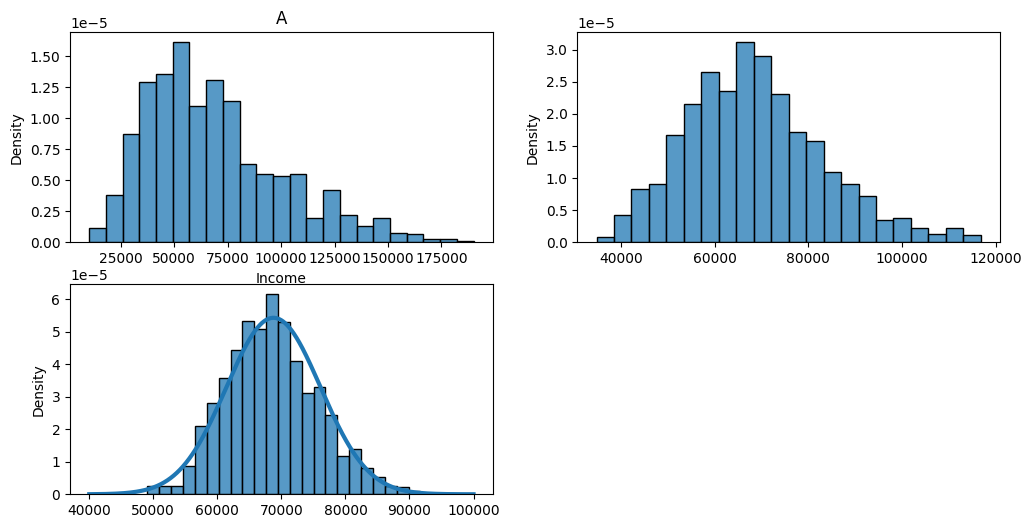

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

df = pd.read_csv("Daten/loans_income.csv")
df.rename(columns={"x": "Income"}, inplace=True)

x_bar = df["Income"].mean()
std = df["Income"].std(ddof=0)
x = np.linspace(40000,100000,100000)
## muss nochmals angeschaut werden
#X = norm(loc=68000,scale=7000)
X = norm(loc=x_bar,scale=std/np.sqrt(20))
X_pdf = X.pdf(x)


sample_A = df.sample(1000)

sample_B = []
for i in range(1000):
    sample_B.append(df["Income"].sample(5).mean())

sample_B = np.array(sample_B)

sample_C = []
for i in range(1000):
    sample_C.append(df["Income"].sample(20).mean())

sample_C = np.array(sample_C)

fig = plt.figure(figsize=(12,6))

pltA = fig.add_subplot(2,2,1)
pltA.set_title("A")
pltA = sns.histplot(sample_A, x="Income", stat="density")

pltB = fig.add_subplot(2,2,2)
pltB = sns.histplot(sample_B, stat="density" )

pltC = fig.add_subplot(2,2,3)
pltC = sns.histplot(sample_C, stat="density")
plt.plot(x,X_pdf,lw=3)
    
plt.show()

![HSLU](Bilder/LogoHSLU.png)